<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_09_Data_Preprocessing_Opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Week 09 - Data preprocessing

In dit labo richten we ons deels op het opschonen van data, met specifieke aandacht voor het omgaan met ontbrekende waarden (missing values). Daarnaast bieden de opdrachten een mooie gelegenheid om de eerder opgedane Python-kennis toe te passen op een grotere dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)

## <span style="color:deeppink"> Demo's

### Data cleaning

Beschouw de zwangerschapsdiabetes dataset waar een aantal ontbrekende en foutieve waarden aanwezig zijn.
Stap voor stap zal deze dataset worden opgekuist.

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0


#### Aantal ontbrekende waarden opvragen

In [3]:
# aantal missing values
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n ' + str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
 Pregnancies                 3
Glucose                     2
BloodPressure               7
SkinThickness               3
Insulin                     5
BMI                         3
DiabetesPedigreeFunction    3
Age                         0
Outcome                     1
dtype: int64


In [4]:
# Toon de rijen met ontbrekende waarden
null_data = dataset[dataset.isnull().any(axis=1)]
null_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
12,10.0,139.0,NaN,0.0,0.0,27.1,1.441,57,0.0
22,7.0,196.0,90.0,0.0,0.0,NaN,0.451,41,1.0
44,7.0,159.0,64.0,NaN,0.0,27.4,0.294,40,0.0
113,4.0,76.0,NaN,0.0,0.0,34.0,0.391,25,0.0
167,4.0,120.0,NaN,0.0,0.0,29.6,0.709,34,0.0
179,NaN,130.0,82.0,0.0,0.0,39.1,0.956,37,1.0
180,6.0,87.0,80.0,0.0,NaN,23.2,0.084,32,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,NaN,21,0.0
188,8.0,109.0,76.0,39.0,NaN,27.9,0.640,31,1.0


#### Listwise deletion

Dit betekent dat alle rijen worden verwijderd waar er minstens 1 ontbrekende waarde voorkomt.  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [5]:
# Listwise deletion: verwijder alle rijen met missing values
dataset_dropna = dataset.dropna(axis=0)
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30,0.0


#### Substitutie van ontbrekende waarden door het gemiddelde

De ontbrekende waarde wordt vervangen door het gemiddelde van alle niet onbrekende waarden in die kolom.

In [6]:
# Gemiddelde substitutie
dataset = pd.read_csv('diabetes.csv')
gemiddelde = dataset.mean()
print(gemiddelde)
dataset = dataset.fillna(dataset.mean())
dataset.head(20)

Pregnancies                   3.850980
Glucose                     120.890339
BloodPressure                68.872536
SkinThickness                20.568627
Insulin                      79.943644
BMI                          31.975556
DiabetesPedigreeFunction      0.894133
Age                          33.240885
Outcome                       0.349413
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00000,148.0,72.000000,35.0,0.0,33.6,0.627,50,1.0
1,1.00000,85.0,66.000000,29.0,0.0,26.6,0.351,31,0.0
2,8.00000,183.0,64.000000,0.0,0.0,23.3,0.672,32,1.0
3,1.00000,89.0,66.000000,23.0,94.0,28.1,0.167,21,0.0
4,0.00000,137.0,40.000000,35.0,168.0,43.1,2.288,33,1.0
5,5.00000,116.0,74.000000,0.0,0.0,25.6,0.201,30,0.0
6,3.00000,78.0,50.000000,32.0,88.0,31.0,0.248,26,1.0
7,10.00000,115.0,0.000000,0.0,0.0,35.3,0.134,29,0.0
8,3.85098,197.0,70.000000,45.0,543.0,30.5,0.158,53,1.0
9,8.00000,125.0,96.000000,0.0,0.0,0.0,0.232,54,1.0


#### Onrealistische/foutieve waarden opsporen en opkuisen

In [7]:
# Opsporen van onrealistische waarden a.d.h.v. describe
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850980,120.890339,68.872536,20.568627,79.943644,31.975556,0.894133,33.240885,0.349413
std,3.365794,31.934556,20.173841,15.906574,115.162787,7.876856,11.642888,11.760232,0.476785
min,0.000000,0.000000,-94.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.632500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,323.000000,81.000000,1.000000


In [8]:
dataset= dataset[dataset['Insulin'] > 0]
dataset= dataset[dataset['SkinThickness'] > 0]
dataset= dataset[dataset['Glucose'] > 0]
dataset= dataset[dataset['BMI'] > 0]
dataset = dataset[dataset['BloodPressure']>0]
dataset.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.00000,391.000000,391.000000
mean,3.295913,122.493326,70.651196,29.093526,155.956089,33.063876,1.34998,30.813299,0.329923
std,3.186997,30.844609,12.353553,10.529405,119.056353,7.031518,16.31192,10.162698,0.470787
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.08500,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,0.27050,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.45200,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.500000,190.000000,37.050000,0.68950,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,323.00000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

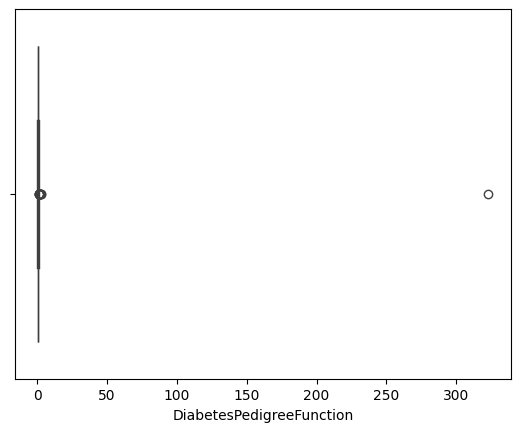

In [9]:
# Uitschieters bij de DiabetesPedigreeFunction
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

<Axes: xlabel='DiabetesPedigreeFunction'>

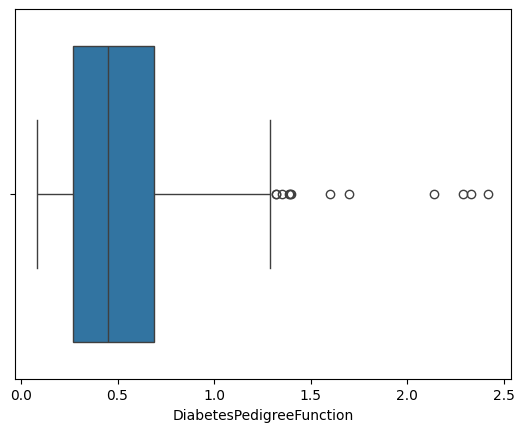

In [10]:
# Verwijderen van uitschieter bij DiabetesPedigreeFunction

gemiddelde = dataset['DiabetesPedigreeFunction'].mean()
stdafwijking = dataset['DiabetesPedigreeFunction'].std()

ondergrens = gemiddelde -3 * stdafwijking
bovengrens = gemiddelde + 3 * stdafwijking

dataset = dataset[(dataset['DiabetesPedigreeFunction']<bovengrens) & (dataset['DiabetesPedigreeFunction']>ondergrens)]
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])




In [11]:
# Aantal overblijvende rijen in de dataset
dataset.shape


(390, 9)

### Interpolatie

Bij interpolatie proberen we (in tijdreeksen) de ontbrekende waarden te achterhalen op basis van de aangrenzende waarden.

In [12]:
dataset = pd.read_csv('/content/temperatures.csv')
dataset.head(20)

,time,temperature
0,0,7.0
1,1,10.0
2,2,15.0
3,3,NaN
4,4,27.0
5,5,33.0
6,6,29.0
7,7,43.0
8,8,NaN
9,9,NaN


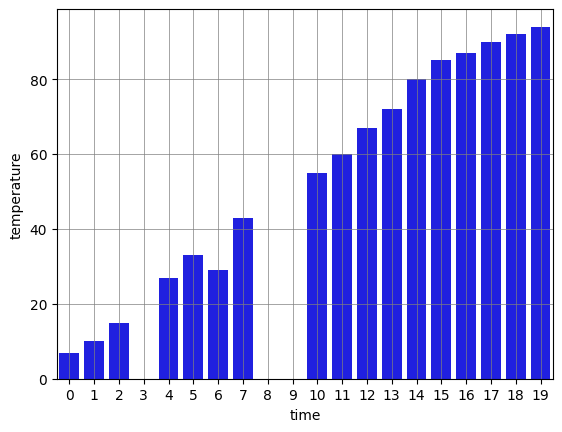

In [13]:
ax = sns.barplot(x='time', y='temperature', data=dataset, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

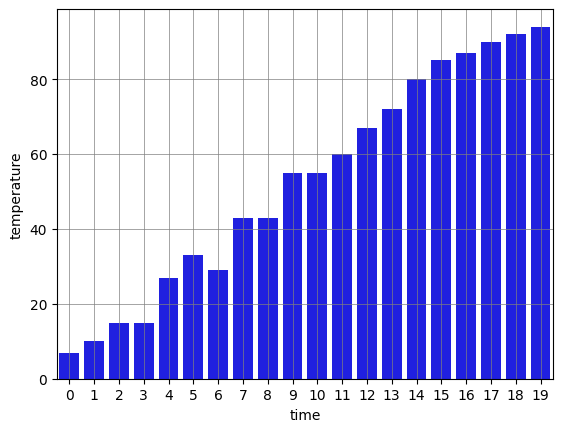

In [14]:
# interpolatie via dichtste waarde
# interpolatie via dichtste waarde

dataset_interpolatie = dataset.interpolate(method='nearest')
ax = sns.barplot(x='time',y='temperature',data=dataset_interpolatie,color='blue')
ax.grid(color='gray',linestyle='-',linewidth=0.5)

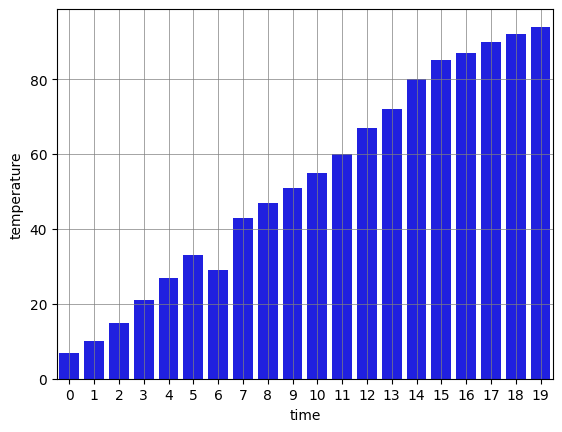

In [15]:
# interpolatie via lineaire interpolatie waarde
dataset_interpolatie = dataset.interpolate(method='linear',limit_direction='forward')
ax = sns.barplot(x='time',y='temperature',data=dataset_interpolatie,color='blue')
ax.grid(color='gray',linestyle='-',linewidth=0.5)


### Resampling

Resampling = hergroeperen van tijdsdata op een andere tijdsfrequentie (en er iets mee doen, zoals som, gemiddelde, etc.)

In [16]:
dataset = pd.read_csv('stockprices.csv', parse_dates =['Date'])
dataset.tail(20)

,Date,Open,High,Low,Close,Volume,Name
2999,2017-12-01,69.80,71.25,69.47,70.10,19712943,AABA
3000,2017-12-04,71.06,71.34,68.16,68.31,15533597,AABA
3001,2017-12-05,67.10,69.38,66.62,68.13,11963099,AABA
3002,2017-12-06,67.78,69.62,67.36,69.41,11646582,AABA
3003,2017-12-07,69.75,70.64,69.48,70.22,7084564,AABA
3004,2017-12-08,71.00,71.63,70.82,71.25,7021125,AABA
3005,2017-12-11,71.70,72.09,71.15,71.53,7359312,AABA
3006,2017-12-12,71.07,71.15,69.55,69.77,11296188,AABA
3007,2017-12-13,69.80,71.76,69.69,71.24,17321301,AABA
3008,2017-12-14,70.60,70.62,68.84,69.23,17077065,AABA


<Axes: xlabel='Date', ylabel='Open'>

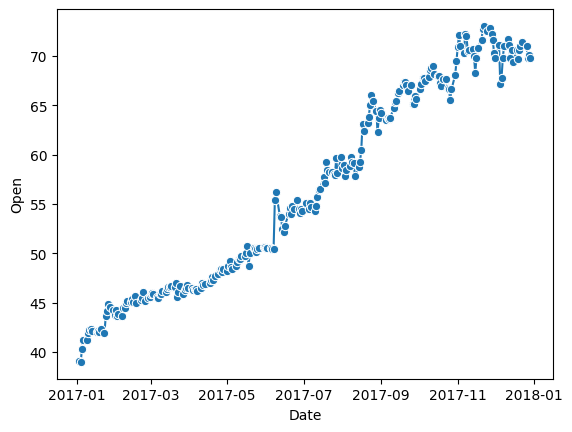

In [17]:
# Plotten van de openingskoers van 2017
dataset_2017 = dataset[pd.DatetimeIndex(dataset['Date']).year == 2017]
dataset_2017.head()

sns.lineplot(x ='Date',y='Open',data=dataset_2017,marker='o')

In [18]:
# Maandelijkse resampling
dataset_month = dataset_2017.resample('ME',on='Date')['Open'].mean()
dataset_month = dataset_month.reset_index()
dataset_month.head(20)

,Date,Open
0,2017-01-31,42.256000
1,2017-02-28,44.916316
2,2017-03-31,46.230870
3,2017-04-30,47.207895
4,2017-05-31,49.645909
5,2017-06-30,53.327727
6,2017-07-31,56.966000
7,2017-08-31,61.336522
8,2017-09-30,65.530000
9,2017-10-31,67.611364


<Axes: xlabel='Date', ylabel='Open'>

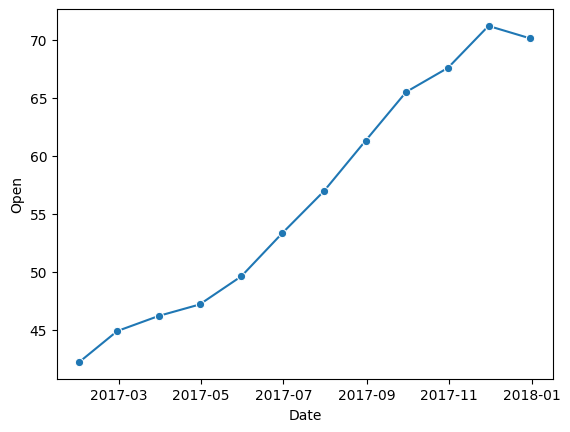

In [19]:
sns.lineplot(x='Date',y='Open',data=dataset_month,marker='o')

### One hot encoding

One hot encoding is een techniek om categorische data (zoals tekstlabels) om te zetten naar numerieke waarden zodat je ze kunt gebruiken in machine learning modellen.

In [20]:
raw_data = {'food_name': ['Apple', 'Chicken', 'Broccoli', 'Chocolat'],'Calories': [95, 231, 50, 549]}
dataset = pd.DataFrame(raw_data)
dataset.head()

,food_name,Calories
0,Apple,95
1,Chicken,231
2,Broccoli,50
3,Chocolat,549


In [21]:
# One-hot encoding
dataset = pd.concat([dataset,pd.get_dummies(dataset['food_name'],prefix='food')],axis=1)
dataset.drop(['food_name'],axis=1, inplace=True)
dataset.head()

,Calories,food_Apple,food_Broccoli,food_Chicken,food_Chocolat
0,95,True,False,False,False
1,231,False,False,True,False
2,50,False,True,False,False
3,549,False,False,False,True


## <span style="color:deeppink">  Opdracht - Deel 1: IMDB

De dataset IMDB.csv bevat gegevens van 1000 films en hun IMDB score.

We beginnen eerst met het cleanen van de dataset door inconsistente data te verwijderen of op te vullen. Daarna wordt de data gevisualieerd of wordt de gevraagde informatie uit de dataset gepuurd.

In [22]:
dataset = pd.read_csv('IMDB.csv')
dataset.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN,1000.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN,872.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN,NaN
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN,NaN
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN,NaN


In [23]:
# Dimensie van de dataset
print(dataset.shape)

(1000, 13)


### Verwijderen of opvullen van missing values

Bepaal het aantal missing values in elke kolom van de dataset.

In [24]:
#  Bepalen van het aantal missing values
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Rank              0
Title             0
Genre            54
Director          0
Actors            0
Year              0
Runtime           0
Rating            0
Votes             0
Revenue         128
Metascore        64
Unnamed: 11    1000
Unnamed: 12     998
dtype: int64


Verwijder alle kolommen die meer dan 129 waarden bevat

In [25]:
dataset_clean = dataset.drop(columns=missing_values_count[missing_values_count > 129].index)
dataset_clean.isnull().sum()

,0
Rank,0
Title,0
Genre,54
Director,0
Actors,0
Year,0
Runtime,0
Rating,0
Votes,0
Revenue,128


Verwijder alle rijen uit de dataset waarbij zowel de genre, metascore en revenue niet gekend is. Verwijderen van rijen op basis van ontbrekende waarden in kolommen kan via dataset.dropna(subset=...)

Bijvoorbeeld verwijderen van alle rijen met ontbrekende waarden in 2 verschillende kolommen:

`dataset_dropna = dataset.dropna(subset = ['kolomnaam1', 'kolomnaam2'])`

In [26]:
# Verwijder alle rijen uit de dataset waarbij de zowel het genre, de metascore en de revenue niet gekend zijn
dataset_dropna = dataset.dropna(subset=['Genre','Metascore','Revenue'],how='all')


In [27]:
missing_values_count_rows = dataset_clean[dataset_clean[['Genre','Metascore','Revenue']].isnull().all(axis=1)]
missing_values_count_rows

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
25,26,Paris pieds nus,NaN,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
123,124,Boyka: Undisputed IV,NaN,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,NaN,NaN
196,197,Hacker,NaN,Akan Satayev,"Callan McAuliffe, Lorraine Nicholson, Daniel E...",2016,95,6.3,3799,NaN,NaN
293,294,The Exception,NaN,David Leveaux,"Lily James, Jai Courtney, Christopher Plummer,...",2016,107,7.7,96,NaN,NaN
356,357,Demain tout commence,NaN,Hugo Gélin,"Omar Sy, Clémence Poésy, Antoine Bertrand, Ash...",2016,118,7.4,5496,NaN,NaN
367,368,American Wrestler: The Wizard,NaN,Alex Ranarivelo,"William Fichtner, Jon Voight, Lia Marie Johnso...",2016,117,6.9,286,NaN,NaN
523,524,Whiskey Tango Foxtrot,NaN,Glenn Ficarra,"Tina Fey, Margot Robbie, Martin Freeman, Alfre...",2016,112,6.6,36156,NaN,NaN
778,779,Chalk It Up,NaN,Hisonni Johnson,"Maddy Curley, John DeLuca, Nikki SooHoo, Drew ...",2016,90,4.8,499,NaN,NaN


Er is een feature (kolom) aanwezig in de dataset waar het niet logisch is om de ontbrekende waarden op te vullen met de mediaan/gemiddelde. Welke feature is dit? Verwijder alle rijen waar de waarde ontbreekt uit deze kolom.

In [33]:
print(dataset_clean.columns)


Index(['Rank', 'Title', 'Genre', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')


Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.
Je kan dit via `dataset=dataset.fillna({'kolomnaam1':gemiddelde_kolom1,'kolomnaam2':gemiddelde_kolom2})`

In [34]:
# Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.
dataset = dataset.fillna({'Revenue':dataset['Revenue'].mean(),'Metascore':dataset['Metascore'].mean()})

### Visualaties en analyse

Gebruik de Seaborn countplot om het aantal films per jaar te visualiseren. Gebruik het jaartal op de x-as en het aantal films op de y-as.

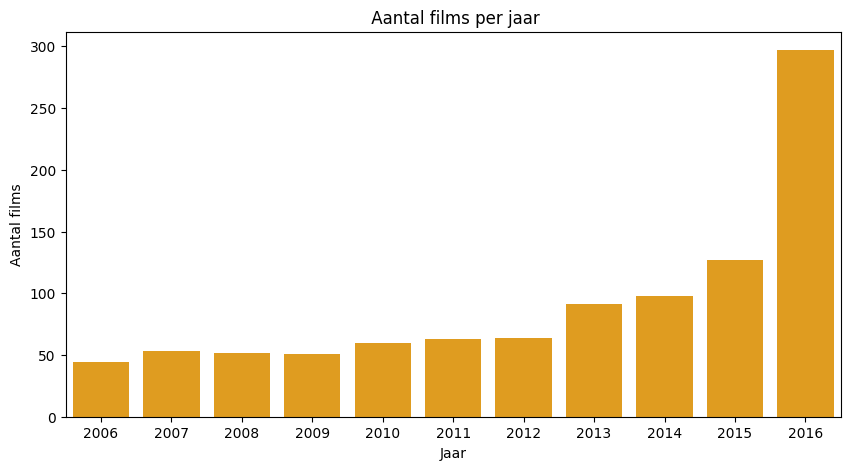

In [35]:
films_per_year = dataset_clean.Year.value_counts().sort_index()
plt.figure(figsize = (10,5))
sns.barplot(x=films_per_year.index,y=films_per_year.values,color='Orange')
plt.title(' Aantal films per jaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal films')
plt.show()

Gebruik de Seaborn countplot om de distributie van de ratings in kaart te brengen.
Sorteer de countplot van de meest gegeven rating naar de minst gegeven rating. Het sorteren kan in de countplot via de property `order=dataset['kolomnaam'].value_counts().index`

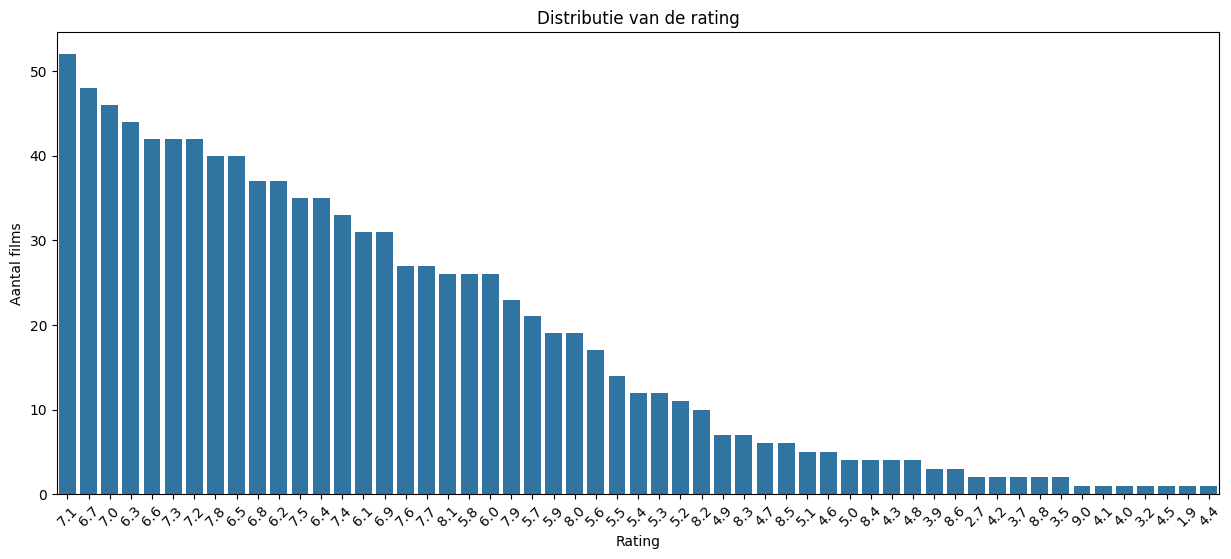

In [36]:
# Distributie van de Rating. Sorteer de countplot van meest gegeven rating naar de minst gegeven rating
plt.figure(figsize = (15,6))
sns.countplot(data=dataset_clean, x='Rating',order=dataset_clean.Rating.value_counts().index)
plt.title('Distributie van de rating')
plt.xlabel('Rating')
plt.ylabel('Aantal films')
plt.xticks(rotation=45)
plt.show()




Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen. Sorteer de countplot van meest voorkomende doelen naar minst voorkomende doelen.

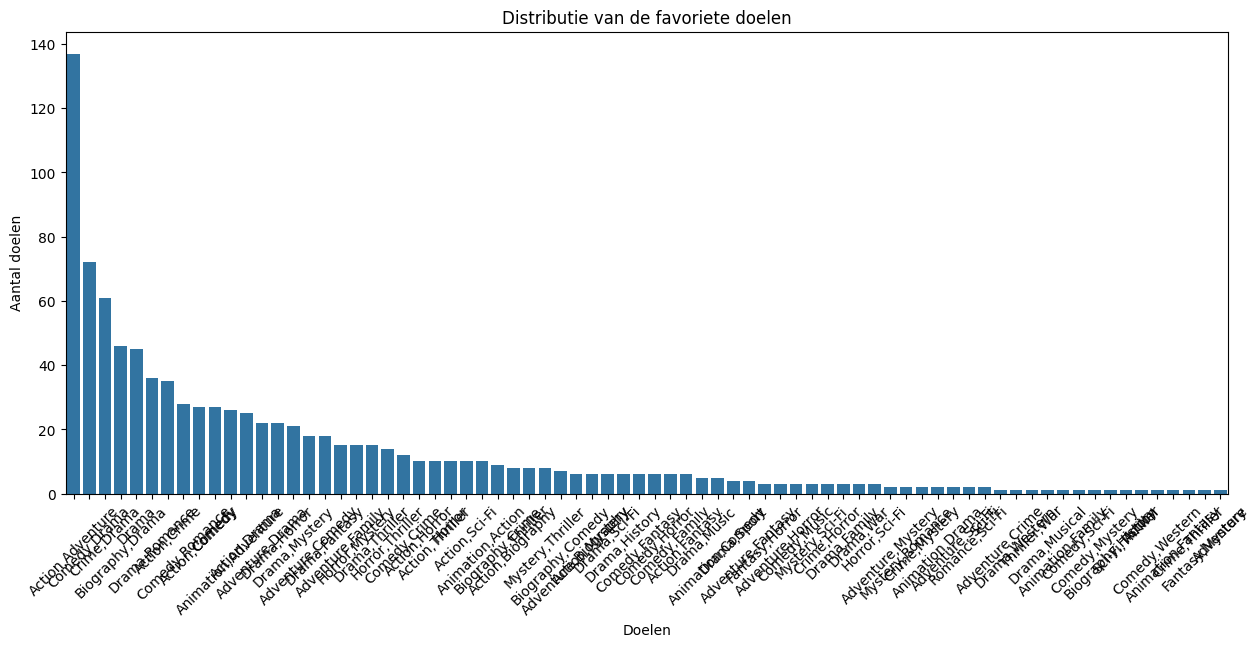

In [37]:
# Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen.
# Sorteer de countplot van meest voorkomende naar minst voorkomende.
plt.figure(figsize = (15,6))
sns.countplot(data=dataset_clean, x='Genre',order=dataset_clean.Genre.value_counts().index)
plt.title('Distributie van de favoriete doelen')
plt.xlabel('Doelen')
plt.ylabel('Aantal doelen')
plt.xticks(rotation=45)
plt.show()

Welk genre komt het meest voor in de dataset?

In [41]:
dataset_clean_genre = dataset_clean.Genre.str.lower()

#split genres by coma / separete genres in unique rows / remove any withespaces
genres = dataset_clean_genre.str.split(',').explode().str.strip()
genre_mode = genres.mode()[0]
print(f"Het meest voorkomende  film genre is : {genre_mode}")

Het meest voorkomende  film genre is : drama


Bepaal welke director het meest films heeft geregiseerd.

In [42]:
# Bepaal welke director het meest films heeft geregiseerd.
director_count = dataset_clean['Director'].value_counts()
director_count

director = director_count.idxmax()
print(f"de director  met de meeste films is : {director}")


de director  met de meeste films is : Ridley Scott


Welk genre kende de hoogste maximale revenue en welk genre het laagst?  Groepeer eerst per genre via `dataset.groupby(['Genre']).max()`

In [44]:
dataset_clean_genre = dataset_clean[['Genre', 'Revenue']]
genre_max_rev = dataset_clean_genre.groupby('Genre')['Revenue'].max()

print(f"Het  genre met de hoogste maximale revenue is: {genre_max_rev.idxmax()} with {genre_max_rev.max()}$(m)")
print(f"The genre met de laagste  maximale revenue is: {genre_max_rev.idxmin()} with {genre_max_rev.min()}$(m)")

Het  genre met de hoogste maximale revenue is: Action,Adventure with 936.63$(m)
The genre met de laagste  maximale revenue is: Adventure with 0.15$(m)


## <span style="color:deeppink">  Opdracht deel 2 - Vision 42

Deze dataset komt uit een project voor het bedrijf vision 42. Deze dataset bestaat uit waarden afkomstig van 2 sensoren, die hun positie in de x  en z richting opmeten.

In [45]:
dataset = pd.read_csv('Vision42.csv')
dataset.head(10)

,N16_z,N17_z,N16_y,N17_y,N16_x,N17_x,date
0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-11 23:00:00
1,1.5,0.9,-2.8,-2.5,-0.1,1.0,2015-11-12 16:18:40
2,1.0,0.7,-3.4,-2.9,0.5,1.3,2015-11-12 18:21:50
3,1.0,0.2,-3.0,-2.6,0.0,1.0,2015-11-12 19:37:44
4,2.0,NaN,-3.8,NaN,0.5,NaN,2015-11-12 20:55:26
5,1.4,1.2,-3.7,-3.3,0.3,1.2,2015-11-12 21:35:32
6,1.1,0.2,-4.0,-3.4,0.3,1.4,2015-11-12 22:53:29
7,0.8,0.4,-3.1,-2.9,0.2,1.2,2015-11-13 00:19:02
8,0.5,1.3,-3.8,-3.4,-0.1,0.9,2015-11-13 01:37:05
9,2.8,1.1,-4.3,-3.7,-0.1,1.2,2015-11-13 02:36:47


In [46]:
# dataset.shape
dataset.shape

(4044, 7)

Bevat deze dataset ontbrekende waarden?

In [47]:
dataset.isnull().sum()

,0
N16_z,451
N17_z,198
N16_y,451
N17_y,198
N16_x,451
N17_x,198
date,0


Er zijn hier toch heel wat ontbrekende waarden, maar aangezien dit een tijdsreeks is mag je de data niet zomaar verwijderen.   
plot de eerste 50 waarden van de dataset in een barplot waar de x-waarde de datum is en de y-waarde de kolom N16_z

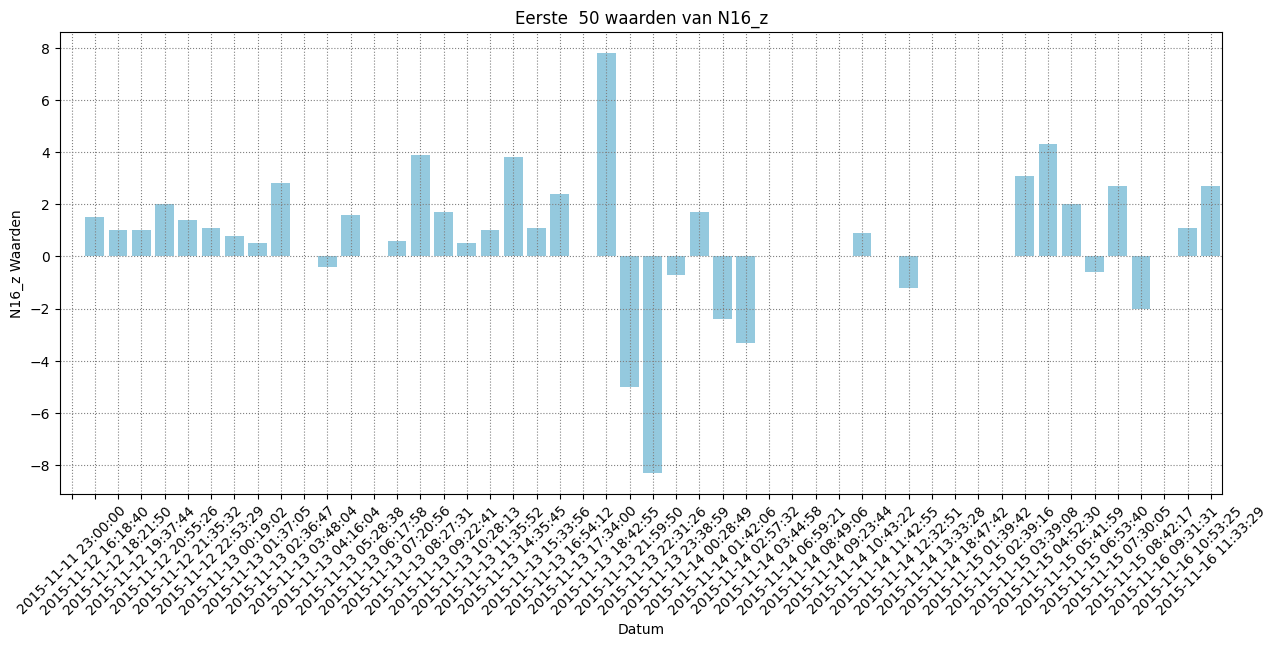

In [48]:
dataset.date = pd.to_datetime(dataset.date) #Converting time to datetime format
dataset_50 = dataset.head(50) #Getting first 50 values

plt.figure(figsize = (15, 6))
sns.barplot(x = dataset_50['date'], y = dataset_50['N16_z'], data = dataset_50, color='skyblue')
plt.xticks(rotation=45)
plt.title("Eerste  50 waarden van N16_z")
plt.xlabel("Datum")
plt.grid(color = 'gray', linestyle = 'dotted')
plt.ylabel("N16_z Waarden")
plt.show()

Gebruik lineare interpolatie om dataset aan te vullen (best de dataset opslaan in een andere dataframe). Plot hierna opnieuw de eerste 50 datapunten in een barplot

In [49]:
dataset_50_completed = dataset_50.interpolate(method='linear', limit_direction = 'forward')


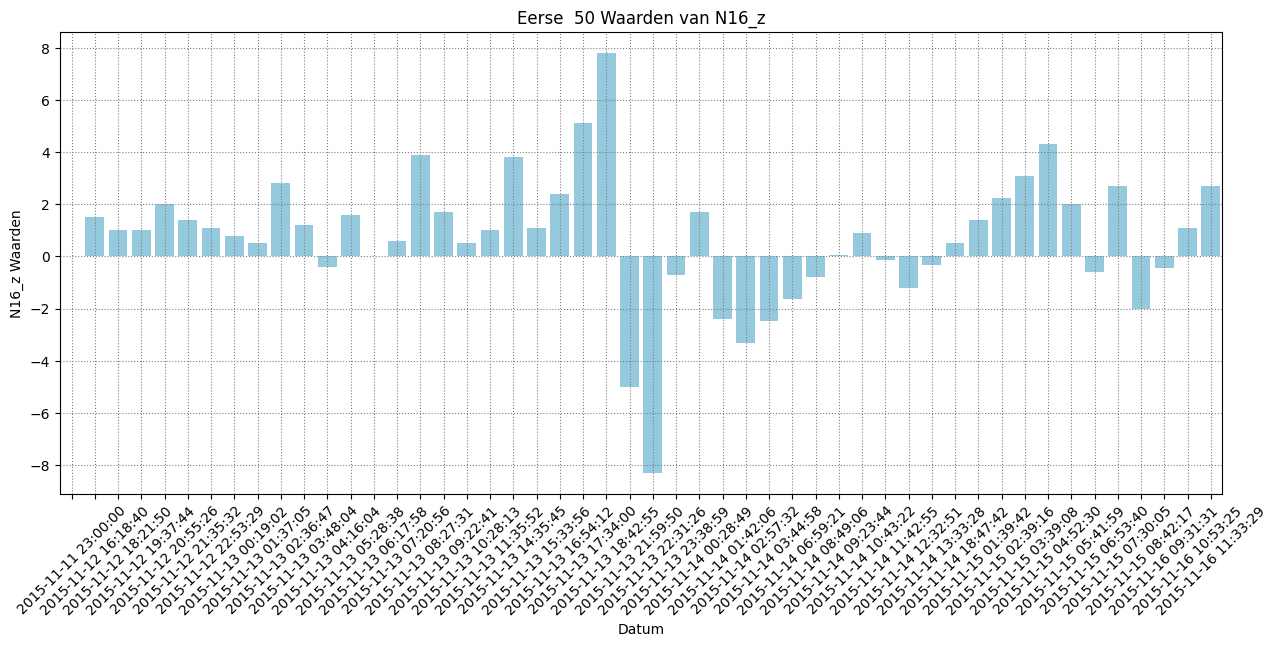

In [51]:
plt.figure(figsize = (15, 6))
sns.barplot(x = dataset_50_completed['date'], y = dataset_50_completed['N16_z'], data = dataset_50_completed, color='skyblue')
plt.title("Eerse  50 Waarden van N16_z")
plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.ylabel("N16_z Waarden")
plt.grid(color = 'gray', linestyle = 'dotted')
plt.show()

Vul de dataset nu opnieuw aan maar met de dichtste waarde. Plot opnieuw de eerste 50 waarden.

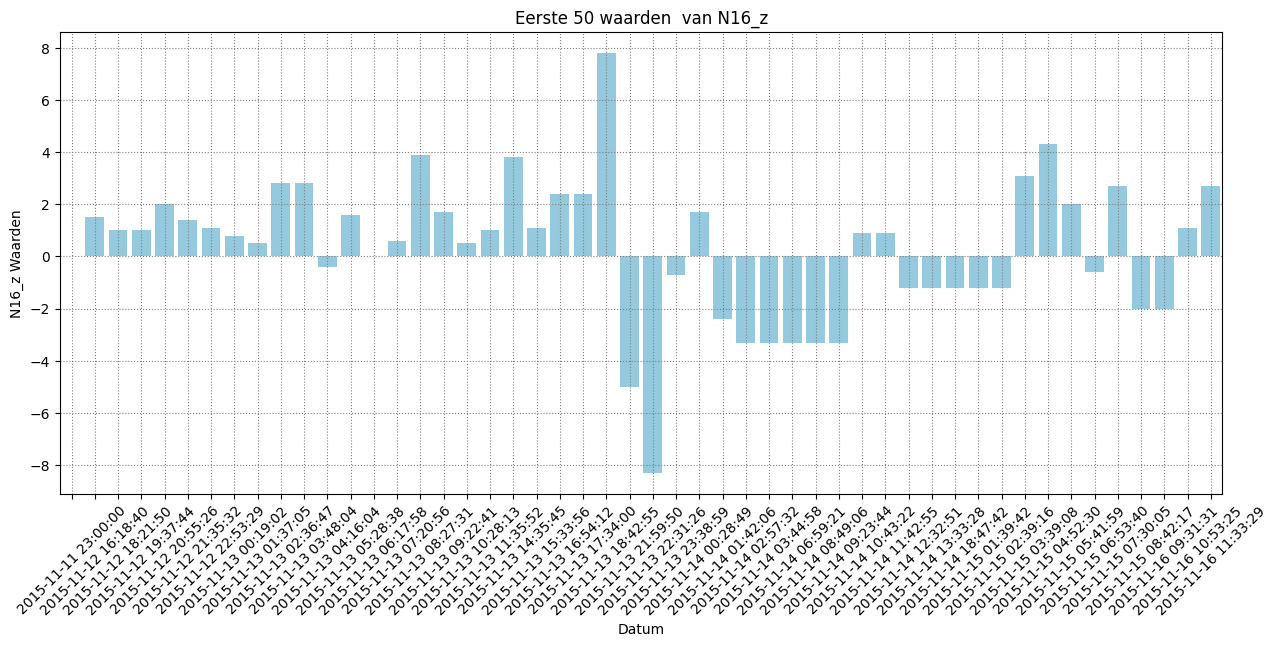

In [52]:
# interpolatie via dichtste waarde
dataset_50_completed_pad = dataset_50.ffill()#'ffill' fill the missing values with closest value

plt.figure(figsize = (15, 6))
sns.barplot(x = dataset_50_completed_pad['date'], y = dataset_50_completed_pad['N16_z'], data = dataset_50_completed_pad, color='skyblue')
plt.title("Eerste 50 waarden  van N16_z")
plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.ylabel("N16_z Waarden")
plt.grid(color = 'gray', linestyle = 'dotted')
plt.show()

## <span style="color:deeppink">  Opdracht deel 3 - One-hot encoding

<img src="Star Wars.jpg">
Deze dataset bestaat uit de mening van personen over een bepaald karakter in Star Wars. Deze dataset wordt gebruikt om de voorspellen of een persoon fan is van Star Wars of niet. Deze dataset heeft echter nog heel wat preprocessing stappen nodig voordat het gebruikt kan worden om voorspellingen te gaan doen. Een deel van de preprocessing stappen moeten jullie zelf doen, voor een ander deel is er sample code voorzien. Daarna is er ook wat code voorzien waar er Machine learning op wordt toegepast (Just for fun :D )

In [53]:
df = pd.read_csv('StarWars.csv')
df.head()

,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,Age,Education,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,Location,StarWars fan
0,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,I don't understand this question,No,No,Man,18-29,High school degree,Yes,Yes,Yes,No,No,No,South Atlantic,No
1,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,Yes,Yes,Yes,Yes,Yes,Yes,South Atlantic,Yes
2,Yes,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Man,18-29,Bachelor degree,Yes,Yes,Yes,Yes,Yes,Yes,West South Central,Yes
3,Yes,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,No,Man,18-29,High school degree,Yes,Yes,Yes,Yes,Yes,Yes,West North Central,Yes
4,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,No,Yes,No,No,No,No,Middle Atlantic,No


Zijn er ontbrekende waarden in deze dataset?

In [54]:
df.isnull().sum()

,0
Have you seen any of the 6 films in the Star Wars franchise?,0
Please rank The Phantom Menace,0
Please rank attack of the clones,0
Please rank Revenge of the Sith,0
Plesase rank a new hope,0
Please rank The Empire Strikes Back,0
Please rank Return of the Jedi,0
Han Solo,0
Luke Skywalker,0
Princess Leia Organa,0


Een AI model kan enkel om met numerieke waarden, dus geen strings, daarom worden alle yes en no in de dataset verandert naar 0 en 1.
vervang alle 'Yes'  naar 1 en alle 'No' naar 0. Dit kan via de methode:  
`dataset = dataset.replace({'te_vervangen_waarde1':naar_deze_waarde1, 'te_vervangen_waarde2':naar_deze_waarde2})`

In [55]:
df['phantom menace seen'] = df['phantom menace seen'].replace(['Yes', 'No'], [1, 0])
df.head()

<ipython-input-55-f74c424c8b14>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['phantom menace seen'] = df['phantom menace seen'].replace(['Yes', 'No'], [1, 0])


,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,Age,Education,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,Location,StarWars fan
0,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,I don't understand this question,No,No,Man,18-29,High school degree,1,Yes,Yes,No,No,No,South Atlantic,No
1,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,1,Yes,Yes,Yes,Yes,Yes,South Atlantic,Yes
2,Yes,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Man,18-29,Bachelor degree,1,Yes,Yes,Yes,Yes,Yes,West South Central,Yes
3,Yes,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,No,Man,18-29,High school degree,1,Yes,Yes,Yes,Yes,Yes,West North Central,Yes
4,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,0,Yes,No,No,No,No,Middle Atlantic,No


De volgende kolommen moeten omgezet worden met one_hot_encoding:
['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?', 'Age', 'Education', 'Location']

In [56]:
kolommen_om_te_encoderen = [
    'Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
    'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian',
    'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
    'Which character shot first?', 'Age', 'Education', 'Location'
]

# Apply one-hot encoding using pandas
encoded_data = pd.get_dummies(df, columns=kolommen_om_te_encoderen, drop_first=True)
encoded_data

,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,StarWars fan,Han Solo_Somewhat favorably,Han Solo_Somewhat unfavorably,Han Solo_Unfamiliar,Han Solo_Very favorably,Luke Skywalker_Somewhat favorably,Luke Skywalker_Somewhat unfavorably,Luke Skywalker_Unfamiliar,Luke Skywalker_Very favorably,Luke Skywalker_Very unfavorably,Princess Leia Organa_Somewhat favorably,Princess Leia Organa_Somewhat unfavorably,Princess Leia Organa_Unfamiliar,Princess Leia Organa_Very favorably,Princess Leia Organa_Very unfavorably,Anakin Skywalker_Somewhat favorably,Anakin Skywalker_Somewhat unfavorably,Anakin Skywalker_Unfamiliar,Anakin Skywalker_Very favorably,Anakin Skywalker_Very unfavorably,Obi Wan Kenobi_Somewhat favorably,Obi Wan Kenobi_Somewhat unfavorably,Obi Wan Kenobi_Unfamiliar,Obi Wan Kenobi_Very favorably,Obi Wan Kenobi_Very unfavorably,Emperor Palpatine_Somewhat favorably,Emperor Palpatine_Somewhat unfavorably,Emperor Palpatine_Unfamiliar,Emperor Palpatine_Very favorably,Emperor Palpatine_Very unfavorably,Darth Vader_Somewhat favorably,Darth Vader_Somewhat unfavorably,Darth Vader_Unfamiliar,Darth Vader_Very favorably,Darth Vader_Very unfavorably,Lando Calrissian_Somewhat favorably,Lando Calrissian_Somewhat unfavorably,Lando Calrissian_Unfamiliar,Lando Calrissian_Very favorably,Lando Calrissian_Very unfavorably,Boba Fett_Somewhat favorably,Boba Fett_Somewhat unfavorably,Boba Fett_Unfamiliar,Boba Fett_Very favorably,Boba Fett_Very unfavorably,C-3P0_Somewhat favorably,C-3P0_Somewhat unfavorably,C-3P0_Unfamiliar,C-3P0_Very favorably,C-3P0_Very unfavorably,R2 D2_Somewhat favorably,R2 D2_Somewhat unfavorably,R2 D2_Unfamiliar,R2 D2_Very favorably,R2 D2_Very unfavorably,Jar Jar Binks_Somewhat favorably,Jar Jar Binks_Somewhat unfavorably,Jar Jar Binks_Unfamiliar,Jar Jar Binks_Very favorably,Jar Jar Binks_Very unfavorably,Padme Amidala_Somewhat favorably,Padme Amidala_Somewhat unfavorably,Padme Amidala_Unfamiliar,Padme Amidala_Very favorably,Padme Amidala_Very unfavorably,Yoda_Somewhat favorably,Yoda_Somewhat unfavorably,Yoda_Unfamiliar,Yoda_Very favorably,Yoda_Very unfavorably,Which character shot first?_Han,Which character shot first?_I don't understand this question,Age_30-44,Age_45-60,Age_60<,Education_Graduate degree,Education_High school degree,Education_Less than high school degree,Education_Some college or Associate degree,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,Yes,1.0,2.0,3.0,4.0,5.0,6.0,No,No,Man,1,Yes,Yes,No,No,No,No,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,Yes,5.0,6.0,1.0,2.0,4.0,3.0,No,No,Man,1,Yes,Yes,Yes,Yes,Yes,Yes,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False

De kolom gender mag verwijderd worden, enig idee waarom?

In [ ]:
# Waarom?
"Omdat de hele kolom dezelfde waarden heeft. Het is waarschijnlijk een fout in het DataFrame en het is ook niet nodig voor het model."

In [61]:
# Kolom verwijderen:
# Stap 1: Zoek 'Yes'/'No'-kolommen
yes_no_columns = [col for col in dataset.columns
                  if dataset[col].dropna().isin(['Yes', 'No']).all()]

# Stap 2: Encodeer deze kolommen
for col in yes_no_columns:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0})


De target(dus de waarde die we proberen te voorspellen) hier is of een persoon al dan niet fan. Plot het aantal fans en niet fans.


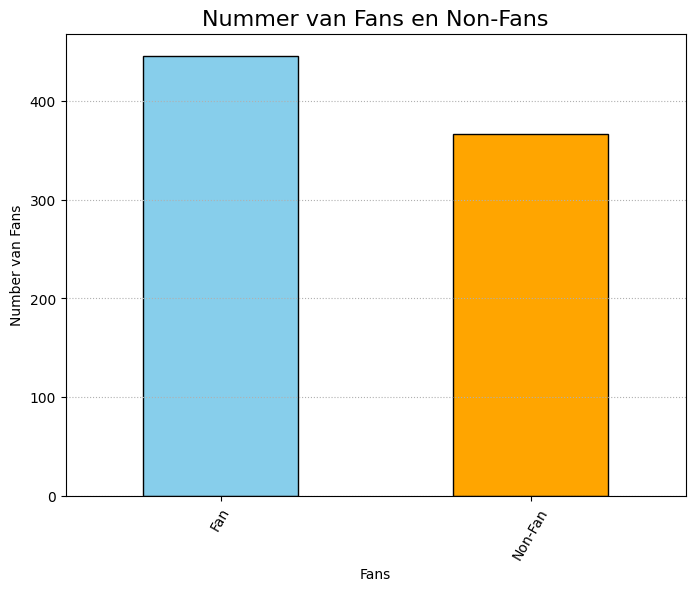

In [62]:
fan_count = df['StarWars fan'].value_counts()

plt.figure(figsize=(8, 6))
fan_count.plot(kind='bar', color=['skyblue', 'orange'], edgecolor="black")
plt.title('Nummer van Fans en Non-Fans', fontsize=16)
plt.ylabel('Number van Fans')
plt.xlabel("Fans")
plt.xticks(ticks=[0, 1], labels=['Fan', 'Non-Fan'], rotation=60)
plt.grid(linestyle='dotted', axis='y')
plt.show()

### Optioneel: vanaf hier start de voorbeeld code van AI, enkel indien je de dataset correct gepreprocessed hebt zou de code perfect moeten werken.
Het kan wel zijn dat je nog sklearn moet installeren, dit kan je doen door in je command line het volgende te typen:  
`pip install -U scikit-learn`  
(zie documentatie indien je anaconda gebruikt: https://scikit-learn.org/stable/install.html)

In [63]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

De dataset wordt opgesplits in target (je te voorspellen waarde) en features  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [66]:
# # De dataset wordt opgesplits in target(je te voorspellen waarde) en features
y = df['StarWars fan'].values
X = df.drop('StarWars fan',axis=1)

Dataset wordt opgesplitst in een training set en een test set, training set wordt gebruikt om model te trainen en test set wordt gebruik om te valideren hoe goed je model werkt.

In [67]:
# Opsplitsen in een training set en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=0)

In [72]:
# # Heel eenvoudig model die voorspellingen doet
logreg = linear_model.LogisticRegression(C=1,solver='liblinear',class_weight='balanced',penalty='l1')
logreg.fit(X_train, y_train)

# # testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test,y_pred)*100))
print('Matrix:\n', confusion_matrix(y_test,y_pred))


ValueError: could not convert string to float: 'Yes'

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# # Trainen en testen van een random forest tree classifier
number_of_trees = 100
max_number_of_features = 6

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFCmodel.fit(X_train,y_train)

# # Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

ValueError: could not convert string to float: 'Yes'